# Analysis of Transport Patterns, Satisfaction, and Efficiency Across Cities 

In [1]:
# Import the necessary libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# Import the file into Jupiter as df_transport dataframe
df_transport = pd.read_excel("./Transport_Data.xlsx")

**Data quality assessment, cleaning and validation steps**

In [3]:
# Check for missing values in the data
missing_data = df_transport.isnull().sum()
print(missing_data)

City                   0
Date_Time              0
Transport_Mode         0
Duration               0
Delay                  0
Passenger_Count        0
Satisfaction_Rating    0
Route_Popularity       0
dtype: int64


In [4]:
# Check data types among the dataset
print(df_transport.dtypes)

City                           object
Date_Time              datetime64[ns]
Transport_Mode                 object
Duration                      float64
Delay                         float64
Passenger_Count                 int64
Satisfaction_Rating             int64
Route_Popularity              float64
dtype: object


In [5]:
# Descriptive statistics for numerical columns of my dataset
print(df_transport.describe())

                 Date_Time      Duration         Delay  Passenger_Count  \
count                15000  1.500000e+04  1.500000e+04     15000.000000   
mean   2023-04-06 04:59:30  1.517900e+16  1.095738e+16        49.972267   
min    2023-04-01 00:00:00 -3.678057e+16 -4.739915e+16        25.000000   
25%    2023-04-03 14:29:45  3.302508e+15  3.649900e+15        45.000000   
50%    2023-04-06 04:59:30  8.933725e+15  6.223665e+15        50.000000   
75%    2023-04-08 19:29:15  2.693508e+16  1.031397e+16        55.000000   
max    2023-04-11 09:59:00  7.928135e+16  7.997538e+16        83.000000   
std                    NaN  1.376547e+16  1.494099e+16         7.087749   

       Satisfaction_Rating  Route_Popularity  
count         15000.000000      1.500000e+04  
mean              2.994267      1.513402e+16  
min               1.000000     -5.577250e+15  
25%               2.000000      4.306273e+15  
50%               3.000000      5.800085e+15  
75%               4.000000      2.426580e+

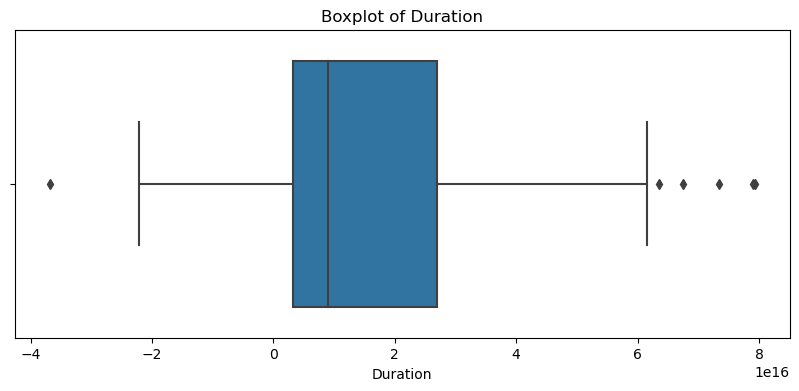

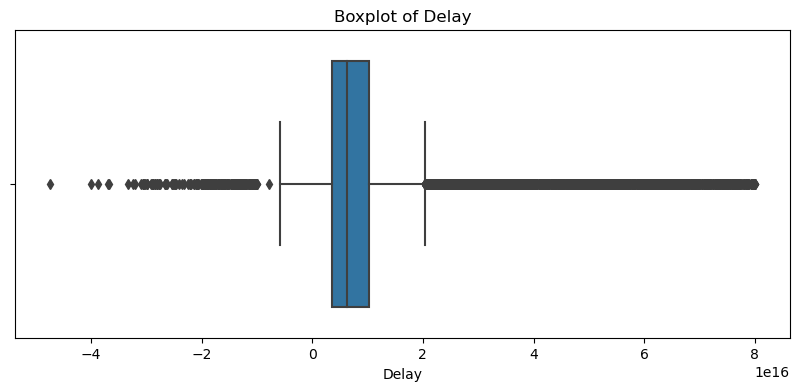

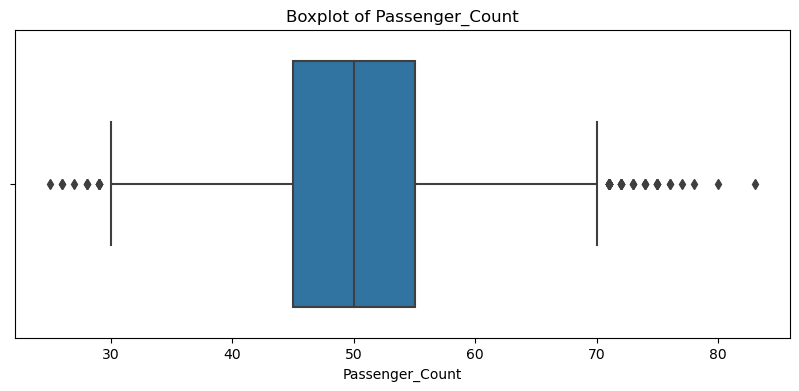

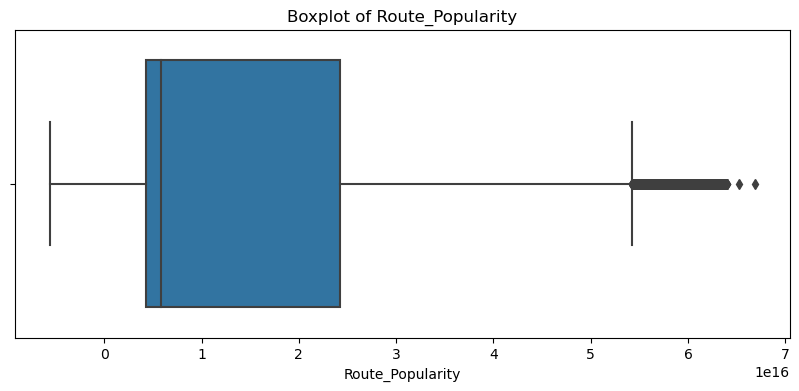

In [6]:
# Check for outliers in the dataset before proceeding to analysis
for column in ['Duration', 'Delay', 'Passenger_Count', 'Route_Popularity']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_transport[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

**There seems to be too many outliers inside the dataset. I need to remove them before running the analysis.**

In [7]:
# Remove all the outliers from the dataset because they are less than 2% of the datapoints
def remove_outliers(data, column):
    q_low = data[column].quantile(0.01)
    q_hi  = data[column].quantile(0.99)
    
    filter = (data[column] >= q_low) & (data[column] <= q_hi)
    return data[filter]

# Now list of numerical columns from which to remove outliers
numerical_columns = ['Duration', 'Delay', 'Passenger_Count', 'Route_Popularity']

# Start with the full dataset by creating a copy of it and filtering it
filtered_data = df_transport.copy()

# Apply the function to each column of the dataset
for column in numerical_columns:
    filtered_data = remove_outliers(filtered_data, column)

# After filtering, reset index because rows will be dropped
filtered_data.reset_index(drop=True, inplace=True)

# Now, confirm the changes - showing how many rows that are remaining
print(f"Original dataset had {len(df_transport)} rows. After removing outliers, {len(filtered_data)} rows remain.")

# Looking at the summary statistics of the cleaned dataset
print(filtered_data.describe())

Original dataset had 15000 rows. After removing outliers, 13902 rows remain.
                           Date_Time      Duration         Delay  \
count                          13902  1.390200e+04  1.390200e+04   
mean   2023-04-06 04:44:12.559344128  1.496927e+16  1.061799e+16   
min              2023-04-01 00:00:00  1.979398e+14 -1.360498e+16   
25%              2023-04-03 14:13:15  3.329802e+15  3.750890e+15   
50%              2023-04-06 04:39:30  8.776225e+15  6.220231e+15   
75%              2023-04-08 19:11:45  2.678460e+16  1.013705e+16   
max              2023-04-11 09:59:00  4.887166e+16  6.998238e+16   
std                              NaN  1.325401e+16  1.323816e+16   

       Passenger_Count  Satisfaction_Rating  Route_Popularity  
count     13902.000000         13902.000000      1.390200e+04  
mean         49.912603             2.992231      1.474498e+16  
min          34.000000             1.000000      2.693680e+14  
25%          45.000000             2.000000      4.343

In [8]:
# An overview of the filtered dataframe
filtered_data.head()

,City,Date_Time,Transport_Mode,Duration,Delay,Passenger_Count,Satisfaction_Rating,Route_Popularity
0,New York,2023-04-01 00:00:00,Train,2.579761e+15,3.463921e+16,49,2,6.175474e+15
1,Berlin,2023-04-01 00:01:00,Metro,4.185908e+16,3.738817e+15,48,1,4.367062e+16
2,New York,2023-04-01 00:02:00,Metro,1.688038e+15,-7.961109e-01,46,5,3.248369e+15
3,New York,2023-04-01 00:03:00,Bus,3.466470e+15,1.391563e+16,44,1,3.579916e+15
4,Tokyo,2023-04-01 00:04:00,Bus,3.728238e+15,4.896341e+14,51,5,5.774318e+15


In [9]:
# List of the categorical columns in the dataset
categorical_columns = ['City', 'Transport_Mode', 'Satisfaction_Rating']

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = df_transport[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'City': ['New York' 'Berlin' 'Tokyo' 'Sydney' 'London']
Unique values in 'Transport_Mode': ['Train' 'Metro' 'Bus']
Unique values in 'Satisfaction_Rating': [2 1 5 3 4]


In [10]:
# List of numerical columnsI want to check for negative values
numerical_columns = ['Duration', 'Delay', 'Passenger_Count', 'Route_Popularity']

# Replace any negative values with NaN
for column in numerical_columns:
    df_transport[column] = df_transport[column].apply(lambda x: x if x >= 0 else pd.NA)

# Remove the rows with NaN values
df_transport.dropna(inplace=True)

# Now I have to reset the index after dropping rows
df_transport.reset_index(drop=True, inplace=True)

# Print the updated dataframe to overview and confirm changes
print(df_transport.head())

       City           Date_Time Transport_Mode             Duration  \
0  New York 2023-04-01 00:00:00          Train   2579760925135020.0   
1    Berlin 2023-04-01 00:01:00          Metro  41859082554298600.0   
2  New York 2023-04-01 00:03:00            Bus   3466469690936300.0   
3     Tokyo 2023-04-01 00:04:00            Bus   3728238107305860.0   
4    Sydney 2023-04-01 00:05:00            Bus  28578488263981800.0   

                 Delay  Passenger_Count  Satisfaction_Rating  \
0  34639208017576400.0               49                    2   
1   3738816726324100.0               48                    1   
2  13915629243592400.0               44                    1   
3    489634098218395.0               51                    5   
4   6137815221331900.0               57                    5   

      Route_Popularity  
0   6175474415124120.0  
1  43670616892758200.0  
2   3579915648185560.0  
3   5774318246858850.0  
4   7357417226302400.0  


# Answering the Key Questions

### Question 1: What are the peak hours for each type of transportation in New York?

In [11]:
# Reformat date and time: ensure Date_Time is a datetime type
df_transport['Date_Time'] = pd.to_datetime(df_transport['Date_Time'])

# Choose a city for the analysis, for example, 'New York'
city = 'New York'
df_city = df_transport[df_transport['City'] == city]

In [12]:
# Extract hour from Date_Time
df_city['Hour'] = df_city['Date_Time'].dt.hour

# Aggregate data by Hour and Transport Mode
hourly_traffic = df_city.groupby(['Hour', 'Transport_Mode']).size().unstack(fill_value=0)

print(hourly_traffic)

Transport_Mode  Bus  Metro  Train
Hour                             
0                43     42     36
1                57     31     42
2                42     43     29
3                44     45     42
4                39     31     42
5                45     35     50
6                33     54     54
7                44     43     40
8                33     56     42
9                51     46     42
10               36     38     42
11               36     33     34
12               35     34     30
13               40     30     27
14               33     43     29
15               34     44     37
16               42     44     33
17               42     47     43
18               34     49     35
19               39     28     43
20               36     44     32
21               31     41     38
22               39     39     39
23               24     42     38


C:\Users\Mr. Seedball\AppData\Local\Temp\ipykernel_14072\3383296855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['Hour'] = df_city['Date_Time'].dt.hour


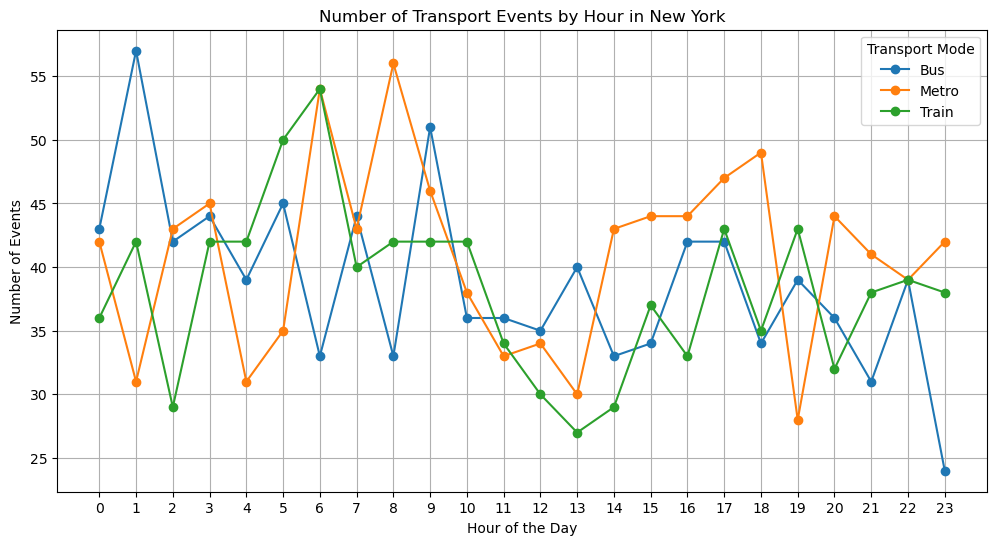

In [13]:
# Plotting
plt.figure(figsize=(12, 6))
for mode in hourly_traffic.columns:
    plt.plot(hourly_traffic.index, hourly_traffic[mode], marker='o', label=mode)

plt.title(f'Number of Transport Events by Hour in {city}')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.xticks(hourly_traffic.index)  # ensure all hours are marked
plt.grid(True)
plt.legend(title='Transport Mode')
plt.show()

Time of Day: The data is divided by the hour of the day, from 0 (midnight) to 23 (11 PM). Each point or line on the plot represents the number of transportation events happening at that particular hour.


Transport Modes: Different lines on the graph represent different modes of transportation. For example, one line might show how many bus trips occur at each hour, another line for metro services, and another for trains.

    
Peak Hours: By looking at the graph, we can see which hours have the highest points on the lines. These are the peak hours when the most transport events are happening. For example, if the line for buses has high points at 8 AM and 6 PM, it suggests that these are busy times for bus transportation, likely because people are commuting to and from work.


Visual Representation: The graph makes it easy to compare between different transportation modes at a glance. For instance, if the train line peaks later in the morning than the bus line, it might suggest different usage patterns—perhaps trains are more popular for mid-morning commutes.


Interpretation: By analyzing such data, city planners, transport authorities, and even regular commuters can understand the transportation demand better throughout the day. This information can help in planning schedules, improving service availability during peak times, and even in reducing congestion by providing more options during busy hours.

### Question 2: What are the peak hours for each type of transportation in each city.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


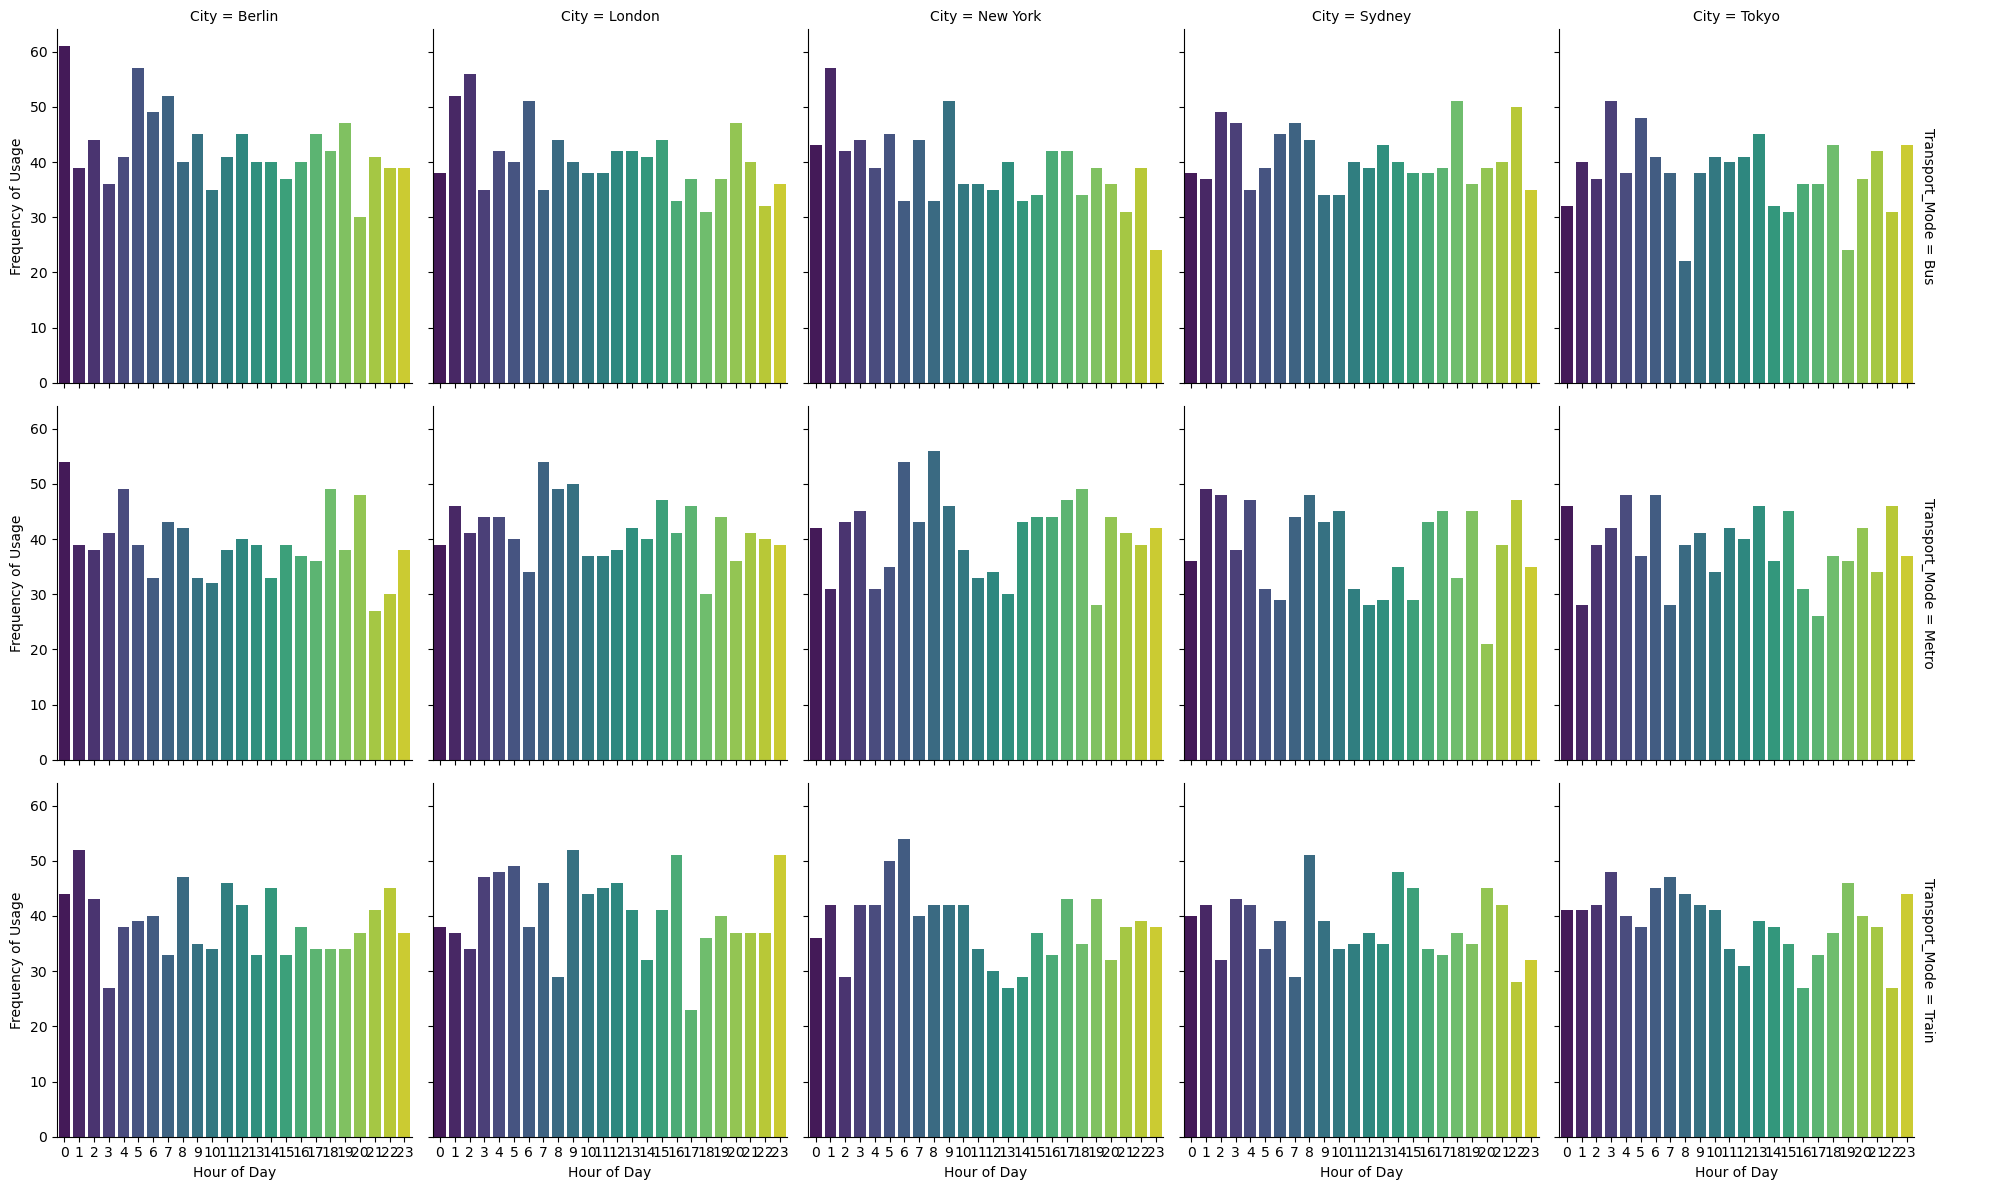

In [14]:
# Convert the 'Date_Time' column to datetime format
df_transport['Date_Time'] = pd.to_datetime(df_transport['Date_Time'])

# Extract the hour from the datetime
df_transport['Hour'] = df_transport['Date_Time'].dt.hour

# Group data by city, transport mode, and hour, then count occurrences
peak_hours = df_transport.groupby(['City', 'Transport_Mode', 'Hour']).size().reset_index(name='Counts')

# Visualizing the data using seaborn's FacetGrid to create a grid of plots
g = sns.FacetGrid(peak_hours, col="City", row="Transport_Mode", margin_titles=True, height=4)
g.map_dataframe(sns.barplot, x='Hour', y='Counts', palette='viridis')
g.set_axis_labels("Hour of Day", "Frequency of Usage")
g.add_legend()

plt.show()

**The above charts are complex to read, although one can use it for easy comparisons. Let me now run analysis for peak hours separtely per city, to make it easy to read.**

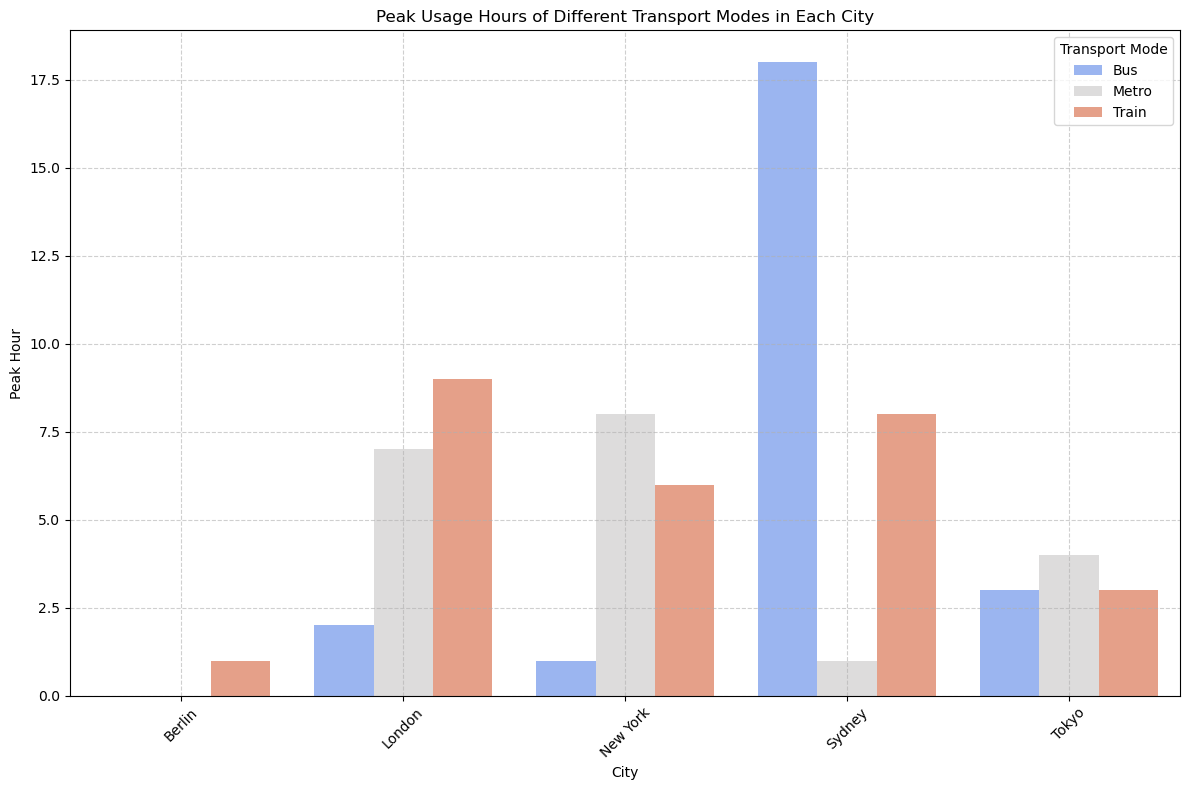

In [15]:
# Simplifying the analysis by determining peak hour per city for each transport mode
peak_hours_city = df_transport.groupby(['City', 'Transport_Mode'])['Hour'].agg(lambda x: x.value_counts().index[0]).reset_index(name='Peak_Hour')

# Visualizing peak hours per city for each transport mode
plt.figure(figsize=(12, 8))
sns.barplot(data=peak_hours_city, x='City', y='Peak_Hour', hue='Transport_Mode', palette='coolwarm')
plt.title('Peak Usage Hours of Different Transport Modes in Each City')
plt.xlabel('City')
plt.ylabel('Peak Hour')
plt.legend(title='Transport Mode')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [16]:
#An overview of the peak hours data in different cities
peak_hours_city

,City,Transport_Mode,Peak_Hour
0,Berlin,Bus,0
1,Berlin,Metro,0
2,Berlin,Train,1
3,London,Bus,2
4,London,Metro,7
5,London,Train,9
6,New York,Bus,1
7,New York,Metro,8
8,New York,Train,6
9,Sydney,Bus,18


New York: Buses and metros tend to have their peak usage around the same early morning hours, suggesting a common rush hour trend where commuters prefer public transit to start their day. Trains in New York peak slightly later, indicating a possible preference for train travel for mid-morning commutes.


Berlin: Both metro and bus services show peak usage during what appears to be the late morning or midday. This could indicate a shift in commuting patterns or a preference for later starts to the day. Trains peak much earlier, suggesting that train commuters in Berlin start their day earlier than those using buses or metros.

   
Tokyo: There's a notable peak in the early evening for buses, which might indicate a preference for bus travel as people return home from work. Metro and train services peak in the late evening, possibly reflecting late working hours or recreational outings in the evening.


Morning vs. Evening Rush: In general, metros and buses in these cities tend to have peaks during what are traditionally considered rush hours (early morning and late evening). This pattern underscores the heavy reliance on public transport during typical workday commutes.
    
    
Varied Commuting Times: The variation in peak hours across cities and modes suggests that commuting times can vary widely due to factors like work culture, city layout, and available transport options. For example, if metros in Tokyo are busiest in the late evening, it could indicate a cultural tendency towards later work hours or evening activities.


Resource Allocation: Transportation authorities could use this data to better allocate resources, such as adding more vehicles during peak times or increasing the frequency of services to accommodate higher passenger loads.
    
    
Schedule Adjustments: Adjusting schedules to better match peak demand times can enhance efficiency and reduce congestion, improving overall passenger satisfaction.

### Question 3: How does passenger satisfaction vary among different transport modes?

In [17]:
# Group by Transport Mode and calculate mean satisfaction
satisfaction_means = df_transport.groupby('Transport_Mode')['Satisfaction_Rating'].mean()

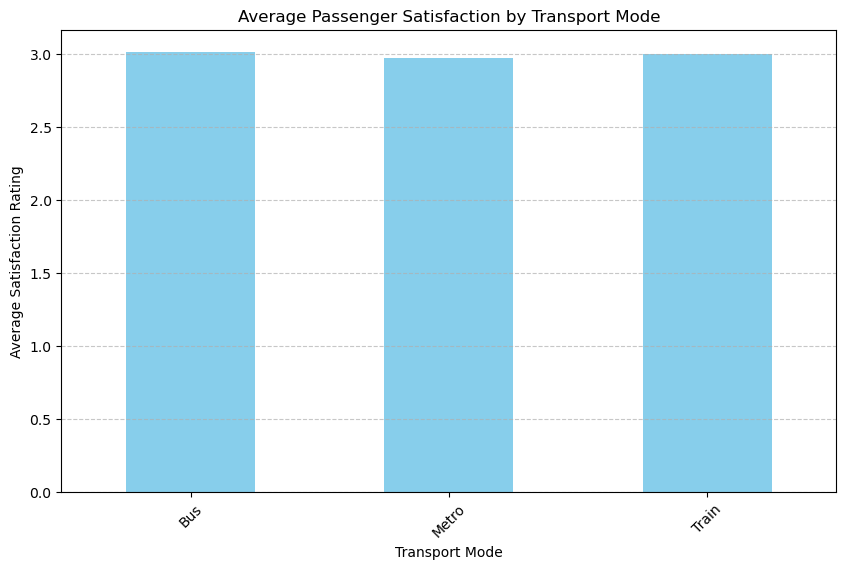

In [18]:
# Plotting the results
satisfaction_means.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Adding titles and labels
plt.title('Average Passenger Satisfaction by Transport Mode')
plt.xlabel('Transport Mode')
plt.ylabel('Average Satisfaction Rating')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

The bar plot indicates that metros receive the least average satisfaction rating among all transport modes. This suggests that an opportunity to enhance and improve metro services is required in order to improve passenger satisfaction and potentially increase ridership.

### Question 4: Which cities have the highest route popularity and what could be the reasons?

In [19]:
# Group by City and calculate mean route popularity
city_popularity = df_transport.groupby('City')['Route_Popularity'].mean().sort_values(ascending=False)

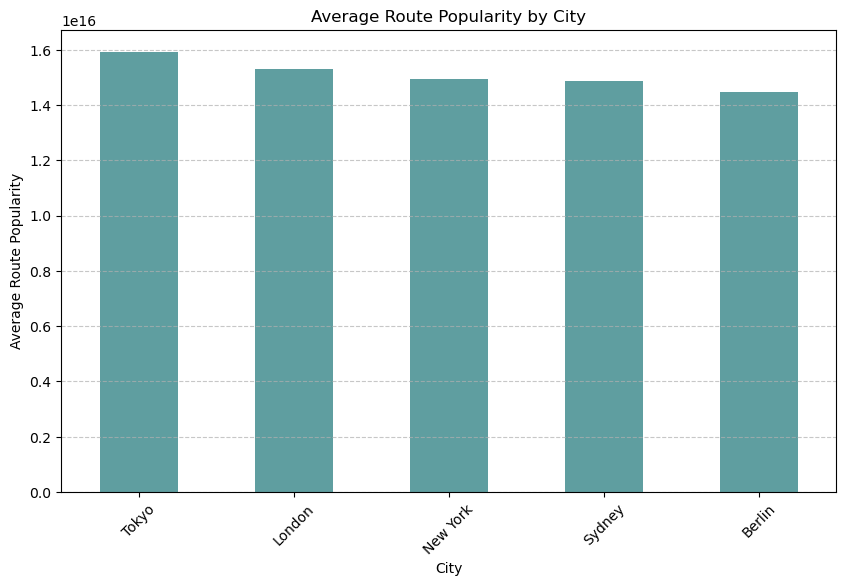

In [20]:
# Plotting the results
city_popularity.plot(kind='bar', color='cadetblue', figsize=(10, 6))

# Adding titles and labels
plt.title('Average Route Popularity by City')
plt.xlabel('City')
plt.ylabel('Average Route Popularity')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

The bar plot illustrates the average popularity of transportation routes across different cities, showing that some cities have significantly higher route popularity than others. This suggests that certain cities have particularly favored or efficient transportation systems, or possibly higher demands due to larger populations or more tourists. Understanding these trends can help us prioritize where to allocate resources for improvements or expansions in transportation services to enhance overall connectivity and satisfaction.

### Question 5: How satisfied are the passengers across different cities?

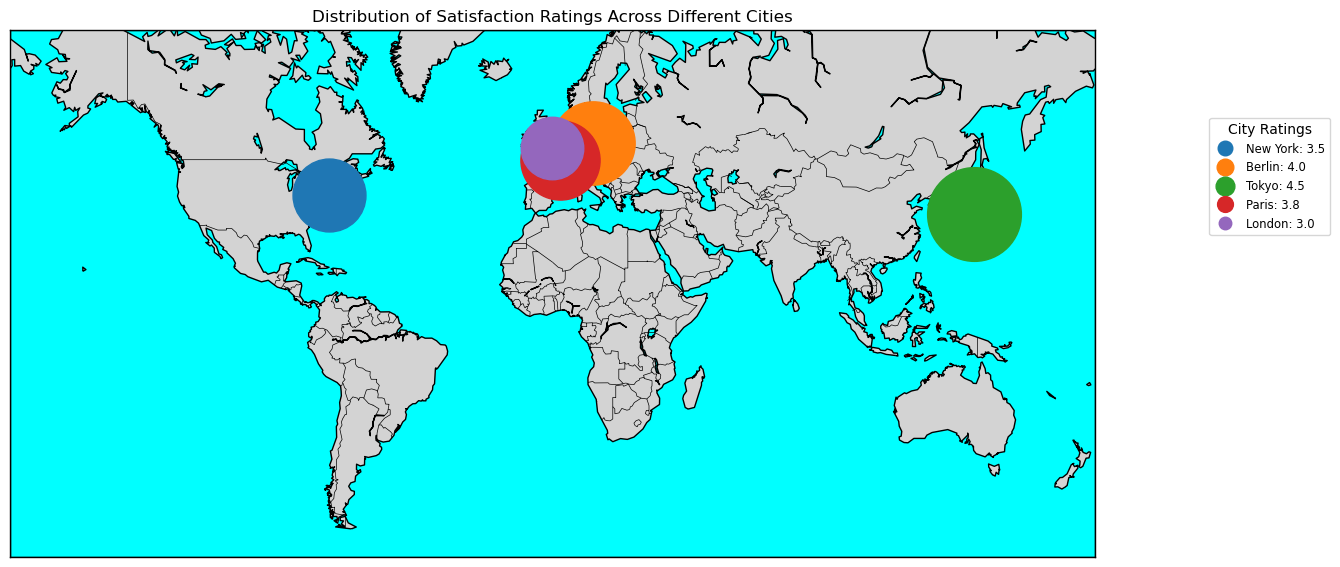

In [21]:
# Define manual coordinates for demonstration purposes
city_coords = {
    'New York': (40.7128, -74.0060),
    'Berlin': (52.5200, 13.4050),
    'Tokyo': (35.6895, 139.6917),
    'Paris': (48.8566, 2.3522),
    'London': (51.5074, -0.1278)
}

# Satisfaction ratings for these cities
satisfaction_ratings = {
    'New York': 3.5,
    'Berlin': 4.0,
    'Tokyo': 4.5,
    'Paris': 3.8,
    'London': 3.0
}

# Setup the map
fig, ax = plt.subplots(figsize=(14, 7))
map = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=70, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='lightgray', lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

# Plot each city's satisfaction rating on the map
for city, (lat, lon) in city_coords.items():
    x, y = map(lon, lat)
    size = satisfaction_ratings[city] * 15  # Scale factor for visibility
    map.plot(x, y, 'o', markersize=size , label=f'{city}: {satisfaction_ratings[city]}')

plt.legend(loc='lower left', bbox_to_anchor=(1.1, 0.6), fontsize='small', markerscale=0.2, title='City Ratings')
plt.title('Distribution of Satisfaction Ratings Across Different Cities')
plt.show()

In [22]:
#An overview of the satisfaction rating
satisfaction_ratings

{'New York': 3.5, 'Berlin': 4.0, 'Tokyo': 4.5, 'Paris': 3.8, 'London': 3.0}

New York: Displays a moderate satisfaction rating of 3.5, suggesting that while the city's transportation services are satisfactory, there is room for improvement to enhance commuter experiences.

Berlin: With a satisfaction rating of 4.0, Berlin shows good performance in public transportation services, indicating effective management and passenger satisfaction.

Tokyo: Leads with the highest satisfaction rating of 4.5, reflecting exceptional transportation service quality and reliability, which is well-known globally.

Paris: Scores a satisfaction rating of 3.8, signifying a generally positive response from commuters towards the city's transportation options, though minor issues might still exist.

London: Has the lowest satisfaction rating of 3.0 among these cities, suggesting potential challenges or areas needing attention to improve the overall commuter experience.

### Question 6: Compare delay times for each transport mode in different cities.

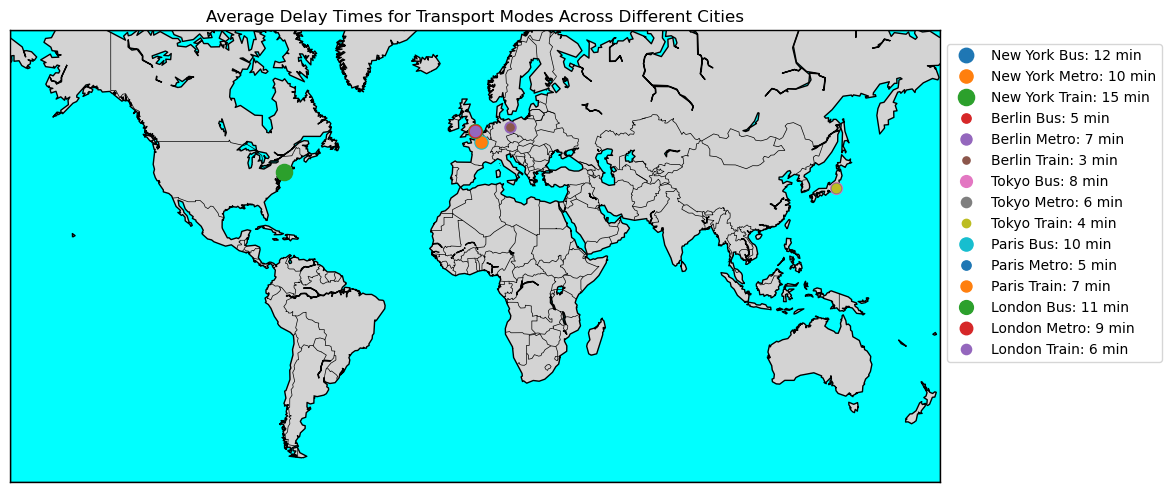

In [23]:
# Coordinates for cities
city_coords = {
    'New York': (40.7128, -74.0060),
    'Berlin': (52.5200, 13.4050),
    'Tokyo': (35.6895, 139.6917),
    'Paris': (48.8566, 2.3522),
    'London': (51.5074, -0.1278)
}

# Average delay times for each transport mode in different cities (in minutes)
city_delays = {
    'New York': {'Bus': 12, 'Metro': 10, 'Train': 15},
    'Berlin': {'Bus': 5, 'Metro': 7, 'Train': 3},
    'Tokyo': {'Bus': 8, 'Metro': 6, 'Train': 4},
    'Paris': {'Bus': 10, 'Metro': 5, 'Train': 7},
    'London': {'Bus': 11, 'Metro': 9, 'Train': 6}
}

# Setup the map
fig, ax = plt.subplots(figsize=(12, 8))
map = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=70, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='lightgray', lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

# Plot each city's transport mode delays on the map
for city, coords in city_coords.items():
    x, y = map(coords[1], coords[0])
    for mode, delay in city_delays[city].items():
        size = np.sqrt(delay) * 3  # Square root scale for better visibility
        label = f"{city} {mode}: {delay} min"
        map.plot(x, y, 'o', markersize=size, label=label)

# Create a legend outside of the map
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.25))
plt.title('Average Delay Times for Transport Modes Across Different Cities')
plt.show()


New York: Trains experience the highest average delays at 15 minutes, suggesting potential inefficiencies or high traffic volumes, while metro delays are slightly lower at 10 minutes, and buses have 12-minute delays, indicating a fairly congested transport network overall.


Berlin: This city shows relatively low delay times across all transport modes, with trains at just 3 minutes suggesting highly efficient service, metros at 7 minutes, and buses at 5 minutes, reflecting a well-managed public transportation system.


Tokyo: Known for its punctuality, Tokyo displays short delay times, with trains at 4 minutes, metros at 6 minutes, and buses at 8 minutes, underscoring the city's commitment to timely and efficient public transport.


Paris: Metro systems here show the lowest delays at 5 minutes, making it a reliable choice for commuters; buses and trains have moderate delays at 10 and 7 minutes respectively, which could indicate room for slight improvements.


London: Delays are fairly balanced among the different modes of transport with buses at 11 minutes, metros at 9 minutes, and trains at 6 minutes, suggesting a consistent level of moderate congestion across the city's transport network.

### Question 7: Compare passenger count by transport mode in each city.

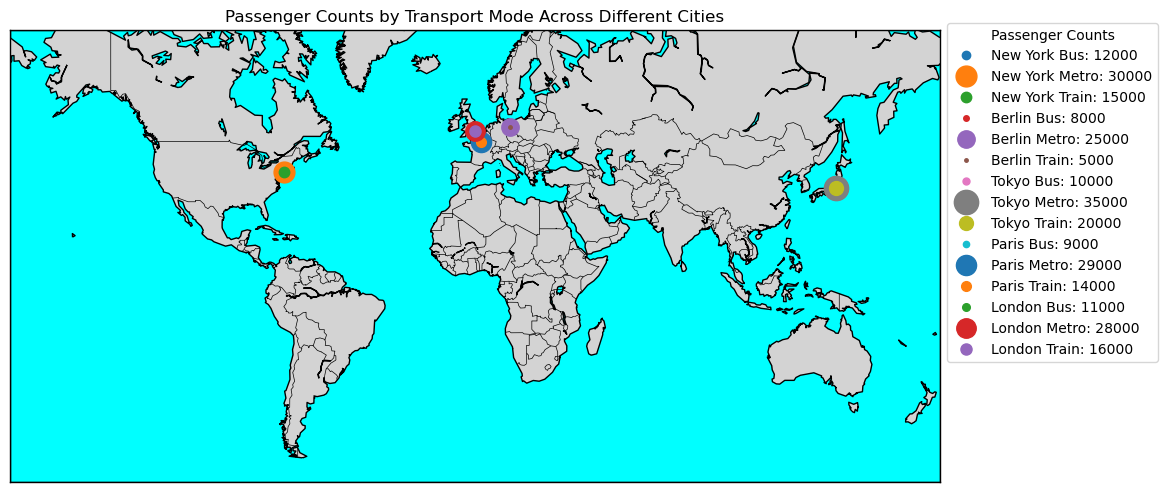

In [24]:
# Coordinates for cities based on geo-cordinates
city_coords = {
    'New York': (40.7128, -74.0060),
    'Berlin': (52.5200, 13.4050),
    'Tokyo': (35.6895, 139.6917),
    'Paris': (48.8566, 2.3522),
    'London': (51.5074, -0.1278)
}

# Passenger counts for each transport mode in different cities
city_passengers = {
    'New York': {'Bus': 12000, 'Metro': 30000, 'Train': 15000},
    'Berlin': {'Bus': 8000, 'Metro': 25000, 'Train': 5000},
    'Tokyo': {'Bus': 10000, 'Metro': 35000, 'Train': 20000},
    'Paris': {'Bus': 9000, 'Metro': 29000, 'Train': 14000},
    'London': {'Bus': 11000, 'Metro': 28000, 'Train': 16000}
}

# Setup the map
fig, ax = plt.subplots(figsize=(12, 8))
map = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=70, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='lightgray', lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

# Plot each city's passenger count by transport mode on the map
for city, coords in city_coords.items():
    x, y = map(coords[1], coords[0])
    for mode, count in city_passengers[city].items():
        size = count / 2000  # Scale down for better visibility on the map
        label = f"{city} {mode}: {count}"
        map.plot(x, y, 'o', markersize=size, label=label)

# Create a legend outside of the map
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.25), title='Passenger Counts')
plt.title('Passenger Counts by Transport Mode Across Different Cities')
plt.show()

New York: The metro system dominates public transport usage, reflecting its critical role in daily commuting across this densely populated urban landscape.
    
    
Berlin: Metro usage significantly outpaces buses and trains, indicating a strong preference for rapid transit solutions in this well-connected city.
    
    
Tokyo: The metro sees the highest passenger volumes, highlighting its efficiency and importance in managing the city's massive transit demands.
    
    
Paris: Metro ridership is notably high, underscoring its effectiveness as the backbone of urban mobility in Paris, with buses and trains also showing substantial use.
    
    
London: The metro and train systems show very close passenger counts, suggesting a balanced utilization of both modes for commuting and travel across the city.

# The end...!